In [1]:
from common import *
from pandas.api.types import CategoricalDtype
import warnings 
warnings.filterwarnings('ignore')
debug = O()
%matplotlib inline
canvas(12,12)

In [2]:
#M = pd.read_pickle(top_dir+'data/given/M.pkl')
N = pd.read_pickle(top_dir+'data/given/N1.pkl')
#test = pd.read_pickle(top_dir+'data/given/test.pkl')

In [3]:
#N.to_pickle(top_dir+'data/given/N1.pkl')

In [ ]:
def fix_N(*,N):
    for c in N:
        if isinstance(N[c].dtype, CategoricalDtype):
            print(c)
            N[c] = N[c].astype(str)
    N.assetCodes = N.assetCodes.map(lambda x: eval(x)); print(1)
    N['assetCodesCount'] = N.assetCodes.map(len); print(2)
    N.subjects = N.subjects.map(lambda x: eval(x)); print(3)
    N['subjectsCount'] = N.subjects.map(len); print(4)
    N.audiences = N.audiences.map(lambda x: eval(x)); print(5)
    N['audiencesCount'] = N.audiences.map(len); print(6)

In [112]:
#N1 = np.concatenate([item[1].iloc[:,:3].values for item in test[:1000]], axis=0)
#N1 = pd.DataFrame.from_items([(c,n) for n,c in zip(N1, N.columns[:3])])

In [14]:
list(zip(N.columns,N.dtypes))

[('time', datetime64[ns, UTC]),
 ('sourceTimestamp', datetime64[ns, UTC]),
 ('firstCreated', datetime64[ns, UTC]),
 ('sourceId', dtype('O')),
 ('headline', dtype('O')),
 ('urgency', dtype('int8')),
 ('takeSequence', dtype('int16')),
 ('provider', dtype('O')),
 ('subjects', dtype('O')),
 ('audiences', dtype('O')),
 ('bodySize', dtype('int32')),
 ('companyCount', dtype('int8')),
 ('headlineTag', dtype('O')),
 ('marketCommentary', dtype('bool')),
 ('sentenceCount', dtype('int16')),
 ('wordCount', dtype('int32')),
 ('assetCodes', dtype('O')),
 ('assetName', dtype('O')),
 ('firstMentionSentence', dtype('int16')),
 ('relevance', dtype('float32')),
 ('sentimentClass', dtype('int8')),
 ('sentimentNegative', dtype('float32')),
 ('sentimentNeutral', dtype('float32')),
 ('sentimentPositive', dtype('float32')),
 ('sentimentWordCount', dtype('int32')),
 ('noveltyCount12H', dtype('int16')),
 ('noveltyCount24H', dtype('int16')),
 ('noveltyCount3D', dtype('int16')),
 ('noveltyCount5D', dtype('int16'))

In [4]:
import seaborn as sns

In [5]:
def iter_jittered_N(*,N):
    n = len(N)
    for c in N:
        debug.c = c
        try:
            int_check = np.issubdtype(N[c].dtype,np.int)
        except TypeError:
            int_check = False
        if int_check:
            yield c, N[c].values+np.random.uniform(-.45,.45,size=[n])
        else:
            yield c, N[c].values
N1 = pd.DataFrame.from_items(iter_jittered_N(N=N))

In [70]:
examp = pd.DataFrame({'a':[5,2.,6],'b':[0,3.,9],'c':[10,11,14.]})

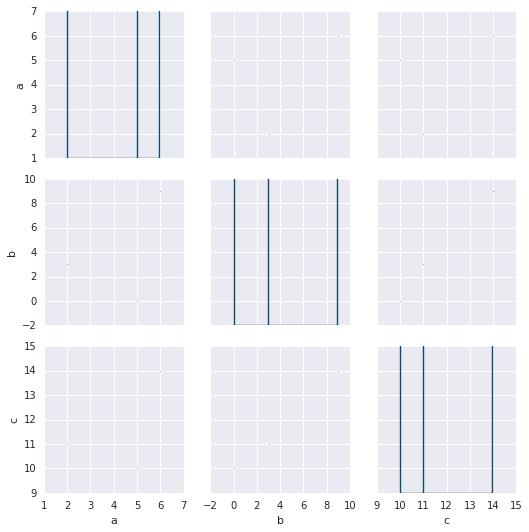

In [73]:
canvas(32,32)
cols = 'a b c'.split()
#sns.pairplot(examp)
g = sns.PairGrid(examp[cols])
g.map_diag(plt.hist, bins=80)
g.map_offdiag(plt.scatter, s=.2, alpha=1);

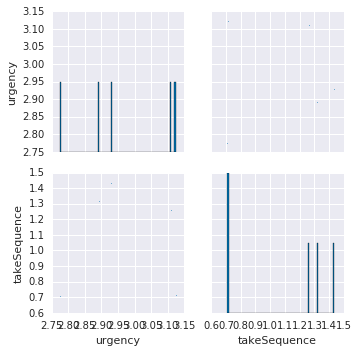

In [12]:
cols = 'urgency takeSequence'.split()
g = sns.PairGrid(N1[cols].head())
g.map_diag(plt.hist, bins=80)
g.map_offdiag(plt.scatter, s=.2, alpha=1);
g.savefig(the_data+'vis/test+ing.png')

In [6]:
N.marketCommentary.value_counts()

False    8814072
True      514678
Name: marketCommentary, dtype: int64

In [7]:
N.urgency.value_counts()

3    6162567
1    3166158
2         25
Name: urgency, dtype: int64

pairplots

In [ ]:
Nsub = 

In [ ]:
plot_columns = [
    ('categories+count',
     'urgency marketCommentary takeSequence bodySize sentenceCount wordCount subjectsCount audiencesCount'.split()),
    ('categories+relevance',
     'urgency marketCommentary takeSequence companyCount sentenceCount firstMentionSentence relevance'.split()),
    ('sentiment',
     'sentimentClass sentimentNegative sentimentNeutral sentimentPositive sentimentWordCount'.split()),
    ('novelty+volume',
     [c for c in N.columns if 'novelty' in c or 'volume' in c]),
    ('categories+sentiment',
     ('urgency marketCommentary takeSequence bodySize companyCount '
      +'sentimentClass sentimentNegative sentimentNeutral sentimentPositive sentimentWordCount').split()),
    ('relevance+sentiment',
     ('sentenceCount wordCount firstMentionSentence relevance subjectsCount audiencesCount '
      +'sentimentClass sentimentNegative sentimentNeutral sentimentPositive sentimentWordCount').split()),
    ('sentiment+volume',
     'sentimentClass sentimentNegative sentimentNeutral sentimentPositive sentimentWordCount'.split()
     +[c for c in N.columns if 'volume' in c]),
    ('sentiment+novelty',
     'sentimentClass sentimentNegative sentimentNeutral sentimentPositive sentimentWordCount'.split()
     +[c for c in N.columns if 'novelty' in c]),
]
for plot_name, cols in plot_columns:
    for flavor, s, alpha in [('', .001, 1)]: #[('fuzzy', 1, .2), ('sharp', .2, 1)]:
        print(the_data+'vis/'+plot_name+'_'+flavor+'.png')
        N.iloc[:1][cols]
        #continue
        g = sns.PairGrid(N[cols])
        g.map_diag(plt.hist, bins=80)
        g.map_offdiag(plt.scatter, s=s, alpha=alpha);
        g.savefig(the_data+'vis/'+plot_name+'_'+flavor+'.png')

/home/ec2-user/Notebooks/two-sigma-financial-news/data/vis/categories+count_fuzzy.png
